# Regresión con Árboles de Decisión

El conjunto de datos de este modelo proviene del repositorio “UCI Machine Learning”. 
Estos datos se recopilaron en 1978, y cada una de las 506 entradas representan datos agregados de 14 características de casas en diversos barrios de Boston.
Las características son:
- CRIM: Índice de criminalidad per capita
- ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).
- INDUS: Proporción de superficie de negocio no minorista.
- CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- RAD: Índice de accesibilidad a las autopistas radiales
- TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad.
- PTRATIO: Ratio de alumnos por profesor
- B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana
- LSTAT: Porcentaje de población de “estatus de bajo nivel”
- MEDV: Mediana del valor de viviendas en propiedad (en miles de dólares)

El objetivo es predecir la mediana del valor de las viviendas (MEDV), basándose en las demás características

## Importar las librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# cargar los datos
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
# Transformar a dataframe para visualizar
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['TARGET'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#Seleccionamos solamente la columna 6 del dataset
X_adr = data[:, np.newaxis, 5]

In [5]:
#Definimos los datos correspondientes a las etiquetas
y_adr = target

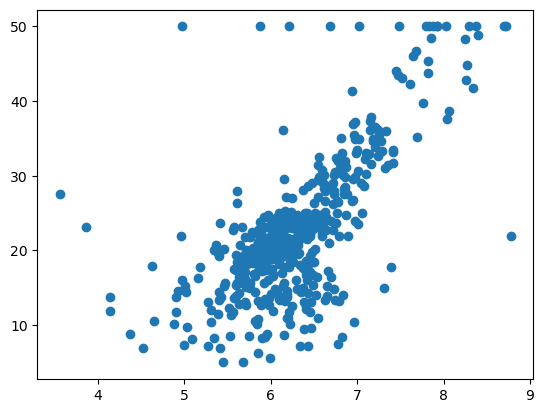

In [6]:
#Graficamos los datos correspondientes
plt.scatter(X_adr, y_adr)
plt.show()

In [11]:
#Separamos los datos en entrenamiento y prueba para probar los algoritmos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adr, y_adr, test_size=0.2)

In [12]:
#Definimos el algoritmo a utilizar
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor(max_depth = 5)

In [13]:
#Entrenamos el modelo
adr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [14]:
#Realizamos una predicción
Y_pred = adr.predict(X_test)
print(Y_pred)

[19.72804233 36.25       29.46666667 42.31666667 19.72804233 21.98333333
 28.54444444 19.72804233 19.72804233 19.72804233 42.31666667 19.72804233
 19.72804233 19.72804233 18.122      12.11176471 19.72804233 18.122
 36.25       18.122      18.122      19.72804233 19.72804233 12.11176471
 19.72804233 19.72804233 19.72804233 19.72804233 45.93571429 24.2173913
 19.72804233 19.72804233 19.72804233 28.54444444 12.11176471 12.11176471
 25.76666667 24.2173913  19.72804233 19.72804233 45.93571429 18.122
 25.76666667 14.56470588 19.72804233 24.2173913  19.72804233 12.11176471
 29.46666667 19.72804233 21.98333333 19.72804233 19.72804233 19.72804233
 36.25       18.122      29.46666667 25.76666667 18.122      19.72804233
 19.72804233 19.72804233 33.45       24.2173913  19.72804233 19.72804233
 18.122      14.56470588 12.11176471 19.72804233 25.76666667 24.2173913
 19.72804233 24.2173913  19.72804233 19.72804233 19.72804233 24.2173913
 19.72804233 19.72804233 49.4        19.72804233 19.72804233 19.

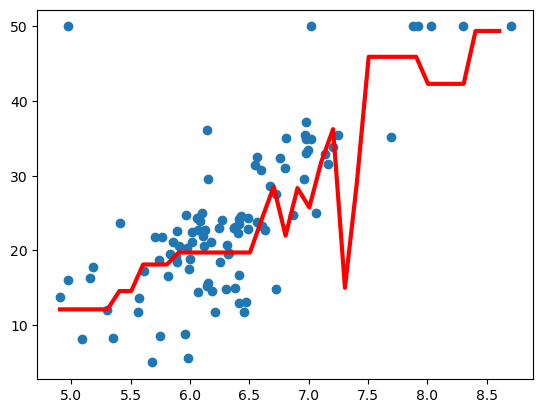

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.6996317352832553


In [15]:
#Graficamos los datos de prueba junto con la predicción
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test)
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)
plt.show()
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(adr.score(X_train, y_train))